# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from weather_api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | sandnessjoen
Processing Record 8 of Set 1 | tokar
Processing Record 9 of Set 1 | laojunmiao
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | punta del este
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,walvis bay,-22.9575,14.5053,285.98,95,44,3.49,NA,1691731215
1,olonkinbyen,70.9221,-8.7187,279.43,98,98,1.33,SJ,1691731215
2,bethel,41.3712,-73.4140,293.42,87,0,2.57,US,1691731131
3,saint-francois,46.4154,3.9054,288.53,94,0,1.03,FR,1691731215
4,grytviken,-54.2811,-36.5092,273.61,95,100,6.04,GS,1691731216


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,285.98,95,44,3.49,NaN,1691731215
1,olonkinbyen,70.9221,-8.7187,279.43,98,98,1.33,SJ,1691731215
2,bethel,41.3712,-73.4140,293.42,87,0,2.57,US,1691731131
3,saint-francois,46.4154,3.9054,288.53,94,0,1.03,FR,1691731215
4,grytviken,-54.2811,-36.5092,273.61,95,100,6.04,GS,1691731216


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

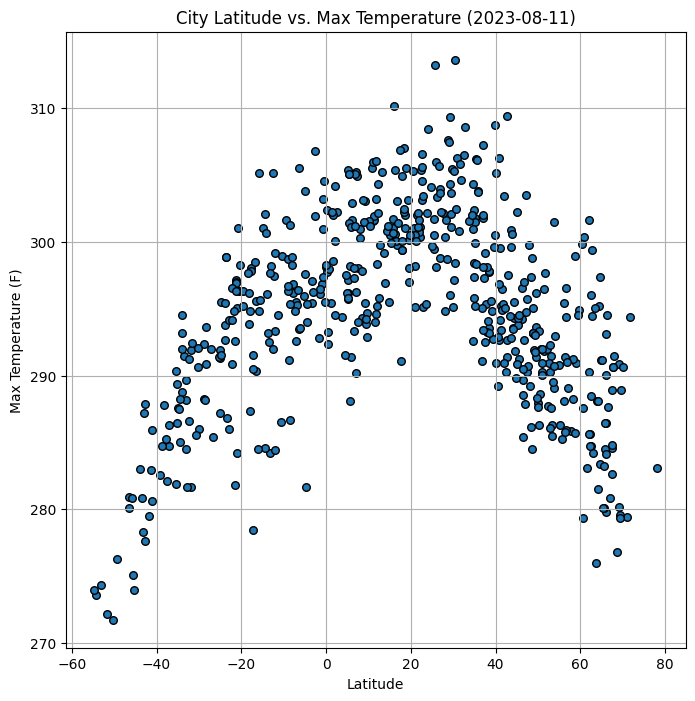

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), s=30, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

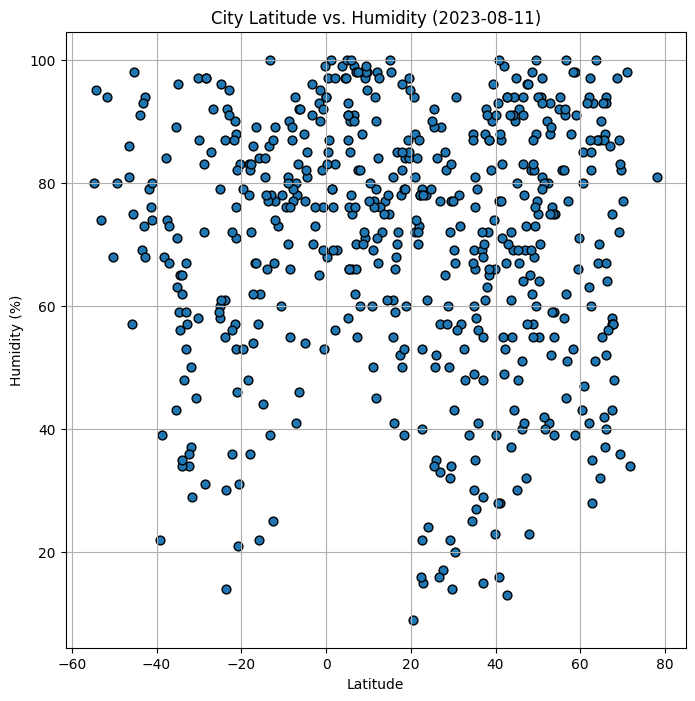

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), s=40, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

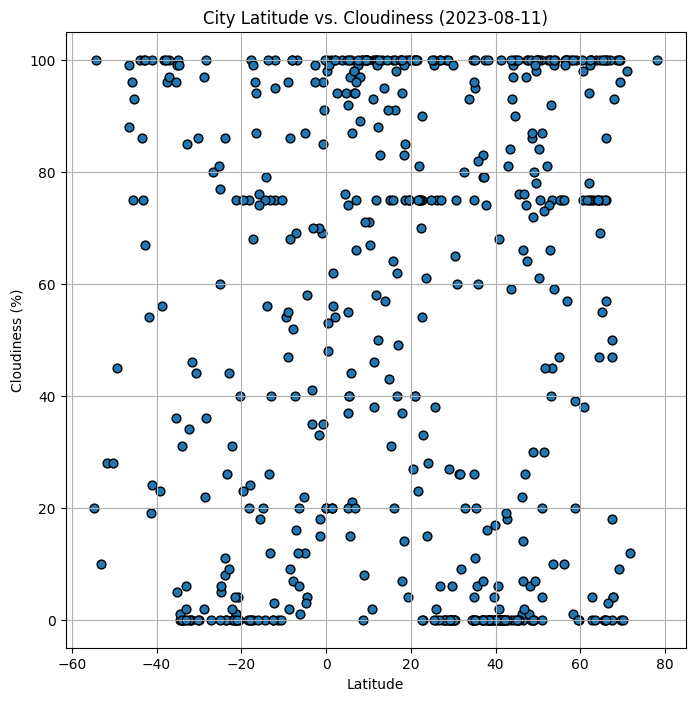

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), s=40, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

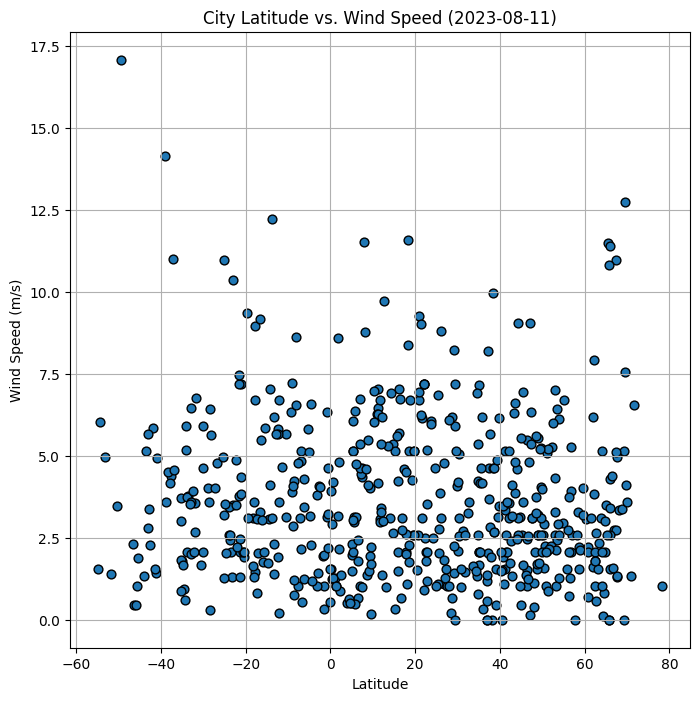

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), s=40, edgecolors="black")
                
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform a linear regression on x and y values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regression_values = x_values * slope + intercept
    # Create line equation string
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_values,"r-")
    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Automatically adjust the annotation position to avoid overlapping with data points
    xy = (x_values.min(), y_values.min())
    xytext = (10, 30)
    textcoords = 'offset points'
    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white")
    
    plt.annotate(line_equation, xy=xy, xytext=xytext, textcoords=textcoords,
                 fontsize=12, color="red", bbox=bbox_props)
    
    # Print r square value
    print(f"The r-value is: {rvalue}")

    # Save the figure
    plt.savefig("../output_data/" + title + ".png")
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,279.43,98,98,1.33,SJ,1691731215
2,bethel,41.3712,-73.4140,293.42,87,0,2.57,US,1691731131
3,saint-francois,46.4154,3.9054,288.53,94,0,1.03,FR,1691731215
6,sandnessjoen,66.0217,12.6316,286.44,94,75,1.54,NO,1691731216
7,tokar,18.4254,37.7290,307.00,39,83,11.56,SD,1691731216


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,285.98,95,44,3.49,NaN,1691731215
4,grytviken,-54.2811,-36.5092,273.61,95,100,6.04,GS,1691731216
5,port elizabeth,-33.9180,25.5701,293.20,62,0,2.06,ZA,1691731216
12,waitangi,-43.9535,-176.5597,283.05,91,100,1.34,NZ,1691731216
13,puerto natales,-51.7236,-72.4875,272.17,94,28,1.39,CL,1691731216


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6319446576161605


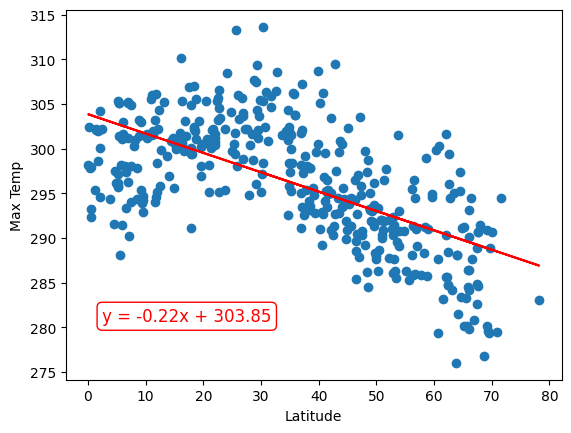

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
linear_regression_plot(x_values, y_values, "Latitude", "Max Temp", "northern_temp_lat_linear_regression")

The r-value is: 0.7583623487710428


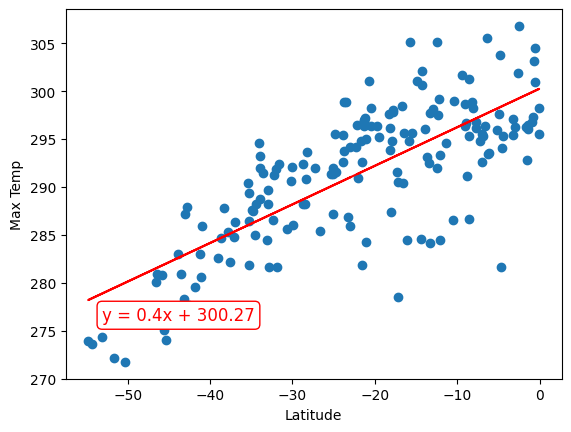

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temp', "southern_temp_lat_linear_regression")

#### **Discussion about the linear relationship:**


**Differences:**

+ Slope and Correlation Direction: The slopes of the linear regression lines for both hemispheres have opposite signs. In the northern hemisphere, the negative slope indicates a decrease in max temperature as latitude increases (moving northwards), while in the southern hemisphere, the positive slope suggests an increase in max temperature as latitude increases (moving southwards).

+ Strength of Correlation: The r-values provide insights into the strength of the correlation between latitude and max temperature. In the southern hemisphere, the r-value indicates a strong positive correlation, meaning that as latitude increases (moving towards the equator), max temperature tends to increase. In the northern hemisphere, the r-value indicates a moderate negative correlation, indicating that as latitude increases (moving away from the equator), max temperature tends to decrease.


In conclusion, the comparison between the northern and southern hemisphere linear regression analyses highlights distinct relationships between latitude and max temperature in each hemisphere. The southern hemisphere demonstrates a stronger positive correlation, indicating a more consistent increase in temperature as latitude approaches the equator. In contrast, the northern hemisphere exhibits a moderate negative correlation, reflecting a gradual temperature decrease as one moves away from the equator towards the North Pole. These findings underscore the influence of geographical location on temperature patterns.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.11510263264058149


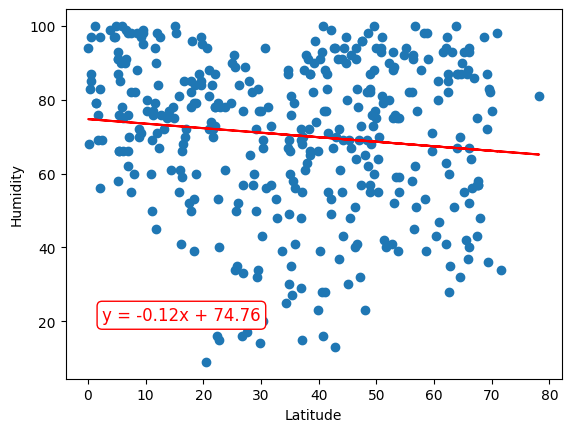

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity', "northern_humidity_lat_linear_regression")

The r-value is: 0.12243999195242063


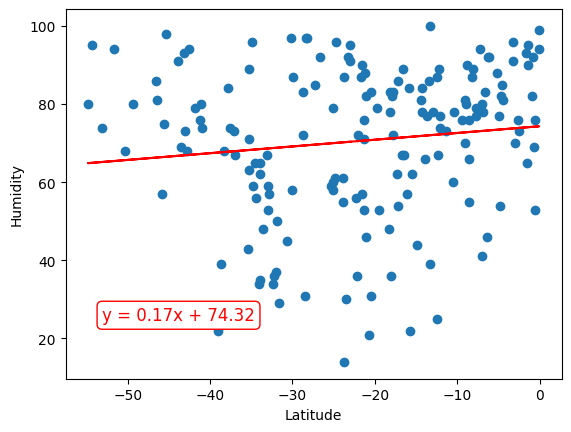

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
linear_regression_plot(x_values, y_values, 'Latitude', 'Humidity', "southern_humidity_lat_linear_regression")

#### **Discussion about the linear relationship:** 

**Differences:**

+ Slope and Correlation Direction: The slopes of the linear regression lines for both hemispheres have opposite signs. In the northern hemisphere, the negative slope indicates a decrease in humidity as latitude increases (moving northwards), while in the southern hemisphere, the positive slope suggests an increase in humidity as latitude increases (moving southwards).

+ Strength of Correlation: The r-values indicate a very weak negative correlation in both hemispheres. In the southern hemisphere, the r-value indicates a weak positive correlation, meaning that as latitude increases (moving towards the equator), humidity tends to increase. In the northern hemisphere, the r-value indicates a weak negative correlation, indicating that as latitude increases (moving away from the equator), humidity tends to decrease.

In conclusion, the comparison between the northern and southern hemisphere linear regression analyses for latitude vs. humidity reveals differing degrees of correlation and impact. While both hemispheres exhibit a negative correlation between latitude and humidity, the southern hemisphere demonstrates a stronger negative correlation, suggesting a more noticeable decrease in humidity as one moves away from the equator. Additionally, the southern hemisphere's analysis indicates a statistically significant correlation, indicating that humidity levels may indeed be influenced by geographical location in this region.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10944385539492275


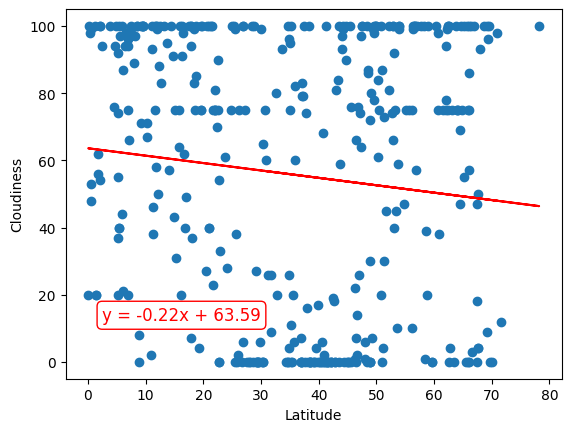

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness', "northern_cloudiness_lat_linear_regression")

The r-value is: -0.06350135668101049


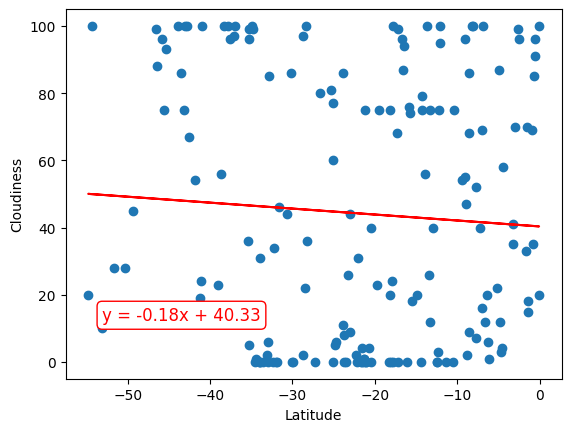

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
linear_regression_plot(x_values, y_values, 'Latitude', 'Cloudiness', "southern_cloudiness_lat_linear_regression")

#### **Discussion about the linear relationship:** 

**Differences:**

+ Slope and Correlation Strength: Both hemispheres exhibit negative slopes, indicating a decrease in cloudiness as latitude increases (moving away from the equator). However, the southern hemisphere's slope is notably steeper, implying a more substantial decline in cloudiness with increasing latitude compared to the northern hemisphere.

+ Correlation Strength: The r-values in both hemispheres are negative, indicating a weak negative correlation between latitude and cloudiness. However, the r-value in the southern hemisphere is more pronounced in magnitude, suggesting a slightly stronger negative correlation compared to the northern hemisphere.

In summary, the comparison of linear regression analyses for latitude vs. cloudiness reveals differing degrees of correlation and influence between the northern and southern hemispheres. Both hemispheres show negative correlations between latitude and cloudiness, implying reduced cloudiness as one moves away from the equator. The southern hemisphere's analysis indicates a somewhat stronger correlation and steeper slope, suggesting a more apparent decrease in cloudiness with latitude. Despite these findings, the statistical significance of these correlations is limited, implying that other factors beyond latitude likely contribute significantly to cloudiness variations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.057819581415869466


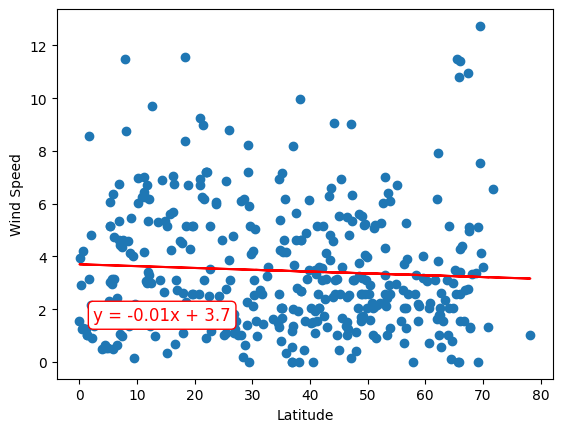

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed', "northern_windspeed_lat_linear_regression")

The r-value is: -0.057645710991621364


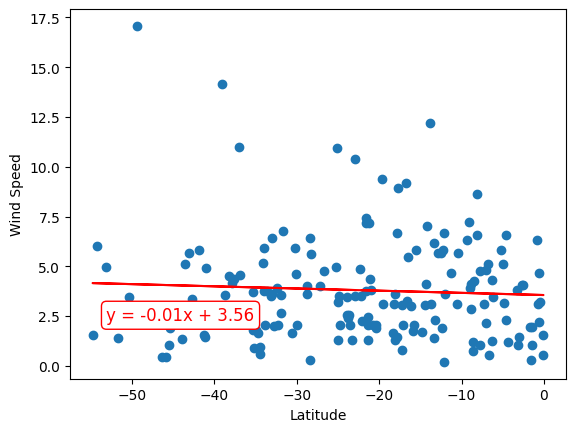

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
linear_regression_plot(x_values, y_values, 'Latitude', 'Wind Speed', "southern_windspeet_lat_linear_regression")

#### **Discussion about the linear relationship:** 

**Similarities:**

+ Slope and Correlation Strength: Both hemispheres exhibit negative slopes, indicating a decrease in wind speed as latitude increases (moving away from the equator). However, the southern hemisphere's slope is notably steeper, suggesting a more significant decline in wind speed with increasing latitude compared to the northern hemisphere.

+ Correlation Strength: The r-values in both hemispheres are negative and quite close to zero, indicating an extremely weak negative correlation between latitude and wind speed. The southern hemisphere's r-value is slightly more pronounced, suggesting a slightly stronger negative correlation.

In summary, the comparison of linear regression analyses for latitude vs. wind speed reveals limited and weak correlations between these variables in both the northern and southern hemispheres. While both hemispheres show negative correlations, indicating a potential decrease in wind speed as latitude increases, the correlations are extremely weak and statistically insignificant. Other factors beyond latitude are likely more influential in determining wind speed patterns.